In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image
import pickle
PYTORCH_ENABLE_MPS_FALLBACK=1



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
train_paths = []
test_paths = []
data_paths = []
for dirname, _, filenames in os.walk('./kaggle/input'):
    print(dirname)
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "test.csv" in path:
            test_path = path
        elif "train.csv" in path:
            train_path = path
        elif "sample_submission" in path:
            sample_path = path
        elif "train_images" in path:
            train_paths.append(path)
        elif "test_images" in path:
            test_paths.append(path)
        elif "preprocessed" in path:
            data_paths.append(path)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./kaggle/input
./kaggle/input/rsna-mamograms-preprocessed
./kaggle/input/rsna-mamograms-preprocessed/data
./kaggle/input/rsna-breast-cancer-detection


In [2]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


In [3]:
train_df.columns
#train_df.cancer.sum()
#train_df.difficult_negative_case.sum()
#train_df.laterality.value_counts()
#train_df.implant.unique()

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'cancer', 'biopsy', 'invasive', 'BIRADS', 'implant', 'density',
       'machine_id', 'difficult_negative_case'],
      dtype='object')

In [5]:

! conda env config vars set PYTORCH_ENABLE_MPS_FALLBACK=1

To make your changes take effect please reactivate your environment


In [6]:
#! pip install pylibjpeg pylibjpeg-libjpeg pydicom
#! pip install python-gdcm
#! conda install matplotlib

In [7]:

import pydicom
import matplotlib.pyplot as plt
#import pylibjpeg

In [8]:
#ds = pydicom.dcmread(train_paths[5]) 
#plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 

In [9]:
noBirads = train_df.BIRADS.isna().sum()
outcome = train_df.cancer
cancer_with_BIRADS = train_df.loc[~train_df.BIRADS.isna()].cancer.sum()

In [10]:
#train_images_path = './kaggle/input/rsna-breast-cancer-detection/train_images/'
train_images_path = './kaggle/input/rsna-mamograms-preprocessed/data/'
def load_image(ptId,imId,train_images_path = train_images_path, showImg = False):
    if train_images_path == './kaggle/input/rsna-breast-cancer-detection/train_images/':
        imgPath = os.path.join(train_images_path,str(ptId),str(imId)+'.dcm')
        ds = pydicom.dcmread(imgPath) 
        if showImg:
            plt.imshow(ds.pixel_array, cmap=plt.cm.bone) 
            pass
    else:
        
        imgPath = os.path.join(train_images_path,str(imId)+'.png')
        ds =  Image.open(imgPath)
        if showImg:
            plt.imshow(ds, cmap=plt.cm.bone) 
            pass

    return ds

In [11]:
#load_image('10130',1672636630,showImg=True)

In [12]:
def show_pt_images(ptId, data = train_df, train_images_path = './kaggle/input/rsna-breast-cancer-detection/train_images/'):
    items = data.loc[data.patient_id == ptId]
    for index, item in items.iterrows():
        imgPath = os.path.join(train_images_path,str(ptId),str(item.image_id)+'.dcm')
        ds = pydicom.dcmread(imgPath) 
        plt.title(f'View: {item["view"]}, Side: {item.laterality}, Outcome: {item.cancer}, BIRADS: {item.BIRADS}')
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        plt.show()

In [13]:
#show_pt_images(int(train_df.loc[train_df.cancer==1].sample().patient_id.to_numpy()))
#show_pt_images(int(train_df.iloc[13].patient_id))

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from skimage.transform import rescale, resize, downscale_local_mean

def preprocess_image(ds,s = 256,normalize = True, showImage = False):
    if isinstance(ds, np. ndarray):
        image = ds
    else:
        image = np.array(ds.pixel_array)
    image = resize(image, [s,s])
    if normalize:
        image = (image - np.min(image))/np.max(image)*255
    if showImage:
        plt.imshow(image, cmap=plt.cm.bone)
        plt.show()
    return image





In [15]:
###### REMOVE EVERYTHING IN WORKING DIRECTORY
'''
for f in os.listdir('/kaggle/working'):
    if f != 'data':
        print("delete:",f)
        if f[0]!=".":
            os.remove(os.path.join('/kaggle/working', f))
'''

'\nfor f in os.listdir(\'/kaggle/working\'):\n    if f != \'data\':\n        print("delete:",f)\n        if f[0]!=".":\n            os.remove(os.path.join(\'/kaggle/working\', f))\n'

In [16]:
####### Save data in more accessible format
####### No need to run since data is already preprocessed and stored in alternative dataset
import cv2
from IPython.display import clear_output
'''
root_path = "/kaggle/working/data/"
if not os.path.exists(root_path):
    os.mkdir(root_path)
for index,row in train_df.iterrows():
    image_id = row.image_id
    if os.path.exists(os.path.join(root_path,f"{image_id}.png")):
        continue
    pt_id = row.patient_id
    print(f"{str(index/len(train_df)*100)[:4]}%, {index}/{len(train_df)}", end = "\r")
    new_image = load_image(pt_id,image_id)
    if index%50 !=0:
        new_image = preprocess_image(new_image, s = 512)
    else:
        clear_output(wait=False)
        new_image = preprocess_image(new_image, s = 512,showImage = True)
    cv2.imwrite(f"{root_path}{image_id}.png", new_image)
'''
    

'\nroot_path = "/kaggle/working/data/"\nif not os.path.exists(root_path):\n    os.mkdir(root_path)\nfor index,row in train_df.iterrows():\n    image_id = row.image_id\n    if os.path.exists(os.path.join(root_path,f"{image_id}.png")):\n        continue\n    pt_id = row.patient_id\n    print(f"{str(index/len(train_df)*100)[:4]}%, {index}/{len(train_df)}", end = "\r")\n    new_image = load_image(pt_id,image_id)\n    if index%50 !=0:\n        new_image = preprocess_image(new_image, s = 512)\n    else:\n        clear_output(wait=False)\n        new_image = preprocess_image(new_image, s = 512,showImage = True)\n    cv2.imwrite(f"{root_path}{image_id}.png", new_image)\n'

<a href="/kaggle/working/processed.zip"> Download File </a>

In [17]:
#!zip -r processed.zip /kaggle/working/data
#<a href="/kaggle/working/processed23.zip"> Download File </a>

In [18]:
main_train_df = train_df[["patient_id",'image_id']]
patients_df = train_df[['patient_id','cancer']].groupby("patient_id").sum(['cancer'])
patients_df['cancer_onehot'] = np.where(patients_df.cancer>0,1,0)
patients_df=patients_df.reset_index() 
patients_df['cancer_onehot'].sum()

486

In [19]:
numSamplePt = len(patients_df.loc[patients_df.cancer>0])
#numSamplePt = 50
okPatients = patients_df.loc[patients_df.cancer==0].sample(numSamplePt,random_state = 123)
cancerPatients = patients_df.loc[patients_df.cancer>0].sample(numSamplePt,random_state = 123)
SampleDf = pd.concat([okPatients,cancerPatients])
len(SampleDf)

972

In [20]:
from sklearn.model_selection import train_test_split

#xtrain, xtest, ytrain, ytest = train_test_split(patients_df.patient_id,patients_df.cancer, test_size = 0.2, stratify = patients_df['cancer_onehot'], random_state = 123)
xtrain, xtest, ytrain, ytest = train_test_split(SampleDf.patient_id,SampleDf.cancer, test_size = 0.2, stratify = SampleDf['cancer_onehot'], random_state = 123)
x_train = main_train_df.loc[main_train_df.patient_id.isin(xtrain)]
x_test = main_train_df.loc[main_train_df.patient_id.isin(xtest)]
y_train = outcome.loc[main_train_df.patient_id.isin(xtrain)]
y_test = outcome.loc[main_train_df.patient_id.isin(xtest)]
print(np.sum(y_train),np.sum(y_test))

927 231


In [21]:

import sympy
from torch.utils.data import Dataset, DataLoader
import torch
from torchvision import transforms, utils


/Users/ehsan/opt/anaconda3/envs/m1PyTorch/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/ehsan/opt/anaconda3/envs/m1PyTorch/lib/python3.7/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: <3224DED3-FCE0-3B10-9D68-9EC019B2AFEC> /Users/ehsan/opt/anaconda3/envs/m1PyTorch/lib/python3.7/site-packages/torchvision/image.so
  Expected in:     <95B0DB5E-6918-3AC2-864B-10F277AD75B0> /Users/ehsan/opt/anaconda3/envs/m1PyTorch/lib/python3.7/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [22]:
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128,128)),
    transforms.RandomHorizontalFlip(),
    #transforms.RandomResizedCrop(256,[0.8,0.9]),
    #transforms.RandomRotation([-10,10]),
    transforms.ToTensor(),
    #transforms.Normalize(0,1),
    ])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    #transforms.Normalize(0,1),
    ])

train_transforms_resNet = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    #transforms.Normalize([0, 0, 0], [1, 1, 1]),
    ])

test_transforms_resNet = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    #transforms.Normalize([0, 0, 0], [1, 1, 1]),
    ])


array([1])

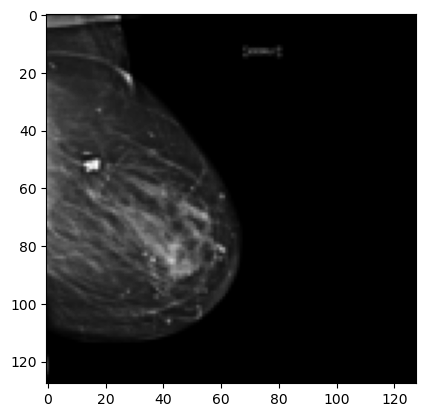

In [23]:
###Defining the dataset class
class MamogramsDataset(Dataset):
    """Mamograms dataset."""

    def __init__(self, data,labels, root_dir, transform=None, make3channels = False):
        """
        Args:
            data (pandas_dataframe): table with patient and image ids
            root_dir (string): Directory with all the image folders.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data = data
        self.labels = labels.to_numpy().reshape([-1,1])
        self.root_dir = root_dir
        self.transform = transform
        self.make3channels = make3channels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.item()
        if isinstance(idx,list):
            idx = idx[0]
        #img_name = os.path.join(self.root_dir,str(self.data.iloc[idx].patient_id),str(self.data.iloc[idx].image_id)+".dcm")
        img_name = os.path.join("./kaggle/input/rsna-mamograms-preprocessed/data/", str(self.data.iloc[idx].image_id)+".png")
        #img_name = os.path.join("./data", str(self.data.iloc[idx].image_id)+".dcm")
        #img_name = os.path.join("/kaggle/working/data", str(idx)+".png")
        #image = pydicom.dcmread(img_name)
        image = Image.open(img_name)
        sample = torch.tensor(preprocess_image(np.array(image),normalize=False,s=512))
        #sample = torch.tensor(np.array(image))
        
        if self.make3channels:
            sample = torch.stack([sample,sample,sample], dim = 0)
        
        if self.transform:
            sample = self.transform(sample)

        return (sample, self.labels[idx])
    def getlabel(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        label = self.labels[idx]
        return label
num = 2
mamoData = MamogramsDataset(x_train,y_train, train_images_path,transform = train_transforms)
mamoDataTest = MamogramsDataset(x_test,y_test, train_images_path,transform = test_transforms)
plt.imshow(mamoData[num][0][0], cmap=plt.cm.gray)
mamoData.getlabel(num)


In [24]:
#pip install torch-summary

/Users/ehsan/opt/anaconda3/envs/m1PyTorch/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/Users/ehsan/opt/anaconda3/envs/m1PyTorch/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/Users/ehsan/opt/anaconda3/envs/m1PyTorch/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ViT_B_32_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_32_Weights.D

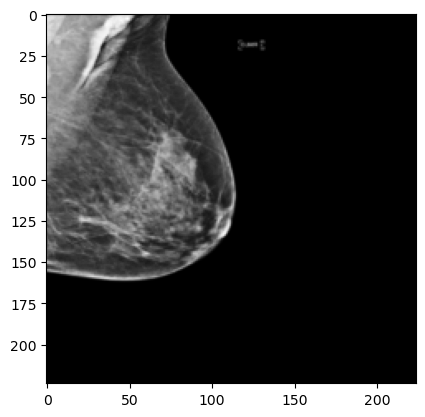

In [25]:
#pip install --upgrade torch torchvision
import torch.nn as nn
import torchvision.models as models

#from torchsummary import summary

resnet18 = models.resnet18(pretrained=False)
customResnet18Seq = nn.Sequential(*(list(resnet18.children())[0:9]))

num = 11
mamoDataResNet = MamogramsDataset(x_train,y_train, train_images_path,transform = train_transforms_resNet, make3channels = True)
mamoDataTestResNet = MamogramsDataset(x_test,y_test, train_images_path,transform = test_transforms_resNet, make3channels = True)
plt.imshow(mamoDataResNet[num][0][0], cmap=plt.cm.gray)
#mamoData.getlabel(num)

class customResnet18(nn.Module):
    def __init__(self, dropout = 0):
        super(customResnet18, self).__init__()
        # TODO define the layers
        self.conv_block1 = customResnet18Seq
        #self.pool1 = nn.AdaptiveAvgPool3d(512)
        self.fc1 = nn.Linear(512,1)
        nn.init.xavier_uniform(self.fc1.weight)
        self.dropout = nn.Dropout(dropout)
        self.bn = nn.BatchNorm1d(512)

    def forward(self, x):
        # TODO define the forward pass
        x = self.conv_block1(x)
        #x= self.pool1(x)
        x = torch.flatten(x, 1)
        x = self.bn(x)
        x = self.dropout(x)
        x = self.fc1(x)
        return x

    def loss(self, prediction, label, reduction='mean'):
        criterion = nn.BCEWithLogitsLoss()
        loss_val = criterion(prediction.squeeze(), label.squeeze().float())
        return loss_val

    def save_model(self, file_path, num_to_keep=1):
        pt_util.save(self, file_path, num_to_keep)
        
    def save_best_model(self, accuracy, file_path, num_to_keep=1):
        if self.accuracy == None or accuracy > self.accuracy:
            self.accuracy = accuracy
            self.save_model(file_path, num_to_keep)

    def load_model(self, file_path):
        pt_util.restore(self, file_path)

    def load_last_model(self, dir_path):
        return pt_util.restore_latest(self, dir_path)
    
resnext101 = models.resnext101_32x8d(pretrained=False)
customResnext101Seq = nn.Sequential(*(list(resnet18.children())[0:9]))
    
class customResnext101(nn.Module):
    def __init__(self, dropout = 0.1):
        super(customResnext101, self).__init__()
        # TODO define the layers
        self.conv_block1 = customResnet18Seq
        #self.pool1 = nn.AdaptiveAvgPool3d(512)
        self.fc1 = nn.Linear(512,1)
        nn.init.xavier_uniform(self.fc1.weight)
        self.dropout = nn.Dropout(dropout)
        self.bn = nn.BatchNorm1d(512)

    def forward(self, x):
        # TODO define the forward pass
        x = self.conv_block1(x)
        #x= self.pool1(x)
        x = torch.flatten(x, 1)
        x = self.bn(x)
        x = self.dropout(x)
        x = self.fc1(x)
        return x

    def loss(self, prediction, label, reduction='mean'):
        criterion = nn.BCEWithLogitsLoss()
        loss_val = criterion(prediction.squeeze(), label.squeeze().float())
        return loss_val

    def save_model(self, file_path, num_to_keep=1):
        pt_util.save(self, file_path, num_to_keep)
        
    def save_best_model(self, accuracy, file_path, num_to_keep=1):
        if self.accuracy == None or accuracy > self.accuracy:
            self.accuracy = accuracy
            self.save_model(file_path, num_to_keep)

    def load_model(self, file_path):
        pt_util.restore(self, file_path)

    def load_last_model(self, dir_path):
        return pt_util.restore_latest(self, dir_path)

from torchvision.models.feature_extraction import create_feature_extractor 
network = getattr(models,"vit_b_32")(pretrained=True)
#print(models.feature_extraction.get_graph_node_names(network))
customVit32FX = create_feature_extractor(network, return_nodes=['getitem_5'])
vit32 = models.vit_b_32(pretrained = True)

class customVit32(nn.Module):
    def __init__(self, p = 0.1):
        super(customVit32, self).__init__()
        # TODO define the layers
        self.vit_block1 = customVit32FX
        self.fc1 = nn.Linear(768,1, bias=True)
        #nn.init.xavier_uniform(self.fc1.weight)
        #self.dropout = nn.Dropout(p)
        #self.bn = nn.BatchNorm1d(768)

    def forward(self, x):
        # TODO define the forward pass
        
        x = self.vit_block1(x)
        #x = self.bn(x)
        #x = self.dropout(x)
        x = x['getitem_5']
        x = self.fc1(x)
        return x

    def loss(self, prediction, label, reduction='mean'):
        criterion = nn.BCEWithLogitsLoss()
        loss_val = criterion(prediction.squeeze(), label.squeeze().float())
        return loss_val

    def save_model(self, file_path, num_to_keep=1):
        pt_util.save(self, file_path, num_to_keep)
        
    def save_best_model(self, accuracy, file_path, num_to_keep=1):
        if self.accuracy == None or accuracy > self.accuracy:
            self.accuracy = accuracy
            self.save_model(file_path, num_to_keep)

    def load_model(self, file_path):
        pt_util.restore(self, file_path)

    def load_last_model(self, dir_path):
        return pt_util.restore_latest(self, dir_path)

#resnet18
modelTemp = customVit32()
#summary(modelTemp, (3, 224, 224))
#print(vit32)
#print(modelTemp)

In [26]:
'''
import time
for num in list(np.random.randint(low = 0,high=len(mamoDataResNet),size=200)):
    img = mamoDataResNet[num][0][0]
    plt.imshow(img, cmap=plt.cm.gray)
    print(mamoDataResNet.getlabel(num))
    print(torch.mean(img),torch.max(img), torch.std(img))
    plt.show()
    time.sleep(1.5)
    clear_output(wait=False)
'''

'\nimport time\nfor num in list(np.random.randint(low = 0,high=len(mamoDataResNet),size=200)):\n    img = mamoDataResNet[num][0][0]\n    plt.imshow(img, cmap=plt.cm.gray)\n    print(mamoDataResNet.getlabel(num))\n    print(torch.mean(img),torch.max(img), torch.std(img))\n    plt.show()\n    time.sleep(1.5)\n    clear_output(wait=False)\n'

In [27]:
def pfbeta(labels, predictions, beta = 1):
    y_true_count = 0
    ctp = 0
    cfp = 0
    
    for idx in range(len(labels)):
        #prediction = np.min(np.max(predictions[idx], 0), 1)
        prediction=predictions[idx]
        if (labels[idx]):
            y_true_count += 1
            ctp += prediction
        else:
            cfp += prediction

    beta_squared = beta * beta
    c_precision = ctp / (ctp + cfp)
    c_recall = ctp / y_true_count
    if (c_precision > 0 and c_recall > 0):
        result = (1 + beta_squared) * (c_precision * c_recall) / (beta_squared * c_precision + c_recall)
        return result
    else:
        return 0

In [28]:
import torch.nn as nn
class TinyImagenetNet(nn.Module):
    def __init__(self):
        super(TinyImagenetNet, self).__init__()
        # TODO define the layers
        self.conv1 = nn.Conv2d(1, 4, 3, stride=2, padding=1)
        self.pool1 = nn.MaxPool2d(3, stride=2)
        self.conv2 = nn.Conv2d(4, 8, 3, stride=2, padding=1)
        #self.conv2b = nn.Conv2d(32, 32, 3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(3, stride=2)
        self.conv3 = nn.Conv2d(8, 16, 3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(3, stride=2)
        self.conv4 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(3, stride=2)
        self.fc1 = nn.Linear(32, 1)
        self.accuracy = None

        self.dropout = nn.Dropout(0.10)

    def forward(self, x):
        # TODO define the forward pass
        x = self.conv1(x)
        x = self.pool1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x)
        #x = F.relu(x)
        #x = self.conv2b(x)
        x = self.pool2(x)
        x = F.relu(x)
        x = self.conv3(x)
        x = self.pool3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = self.pool4(x)
        x = F.relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        #x = F.sigmoid(x)
        #raise NotImplementedError('Need to define the forward pass')

        
        return x

    def loss(self, prediction, label, reduction='mean'):
        criterion = nn.BCEWithLogitsLoss()
        loss_val = criterion(prediction.squeeze(), label.squeeze().float())
        return loss_val

    def save_model(self, file_path, num_to_keep=1):
        pt_util.save(self, file_path, num_to_keep)
        
    def save_best_model(self, accuracy, file_path, num_to_keep=1):
        if self.accuracy == None or accuracy > self.accuracy:
            self.accuracy = accuracy
            self.save_model(file_path, num_to_keep)

    def load_model(self, file_path):
        pt_util.restore(self, file_path)

    def load_last_model(self, dir_path):
        return pt_util.restore_latest(self, dir_path)

In [29]:
import time
import tqdm
from sklearn.metrics import f1_score
def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    losses = []
    accuracies = []
    correct = 0
    for batch_idx, (data, label) in enumerate(tqdm.tqdm(train_loader)):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = model.loss(output, label)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        #optimizer.zero_grad()
        with torch.no_grad():
            pred = (F.sigmoid(output)>0.5)
            #print(torch.sum(pred), list(zip(output[:10],label[:10])))
            correct_mask = pred.eq(label.view_as(pred))
            num_correct = correct_mask.sum().item()
            correct += num_correct
        if batch_idx%50==0:
            #print(f"predicted sum:{torch.sum((F.sigmoid(output)>0.5)).item()}, GT sum: {torch.sum(label).item()}")
            #print([output,F.sigmoid(output)])
            pass
        if batch_idx % log_interval == 0:
            print('{} Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                time.ctime(time.time()),
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    train_accuracy = 100. * correct / len(train_loader.dataset)
    return np.mean(losses), train_accuracy

def test(model, device, test_loader, return_images=False, log_interval=None):
    model.eval()
    test_loss = 0
    correct = 0

    correct_images = []
    correct_values = []
    f1s=[]
    
    error_images = []
    predicted_values = []
    gt_values = []
    preds = []
    labels = []
    outputs = []
    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(test_loader):
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss_on = model.loss(output, label, reduction='sum').item()
            test_loss += test_loss_on
            f1 = f1_score((F.sigmoid(output).cpu()>0.5),label.cpu())
            f1s.append(f1)
            pred = (F.sigmoid(output)>0.5)
            preds+=(F.sigmoid(output)>0.5).cpu().squeeze().tolist()
            labels += label.cpu().squeeze().tolist()
            outputs += F.sigmoid(output).cpu().squeeze().tolist()
            correct_mask = pred.eq(label.view_as(pred)).squeeze()
            num_correct = correct_mask.sum().item()
            correct += num_correct
            if return_images:
                if num_correct > 0:
                    correct_images.append(data[correct_mask, ...].data.cpu().numpy())
                    correct_value_data = label[correct_mask].data.cpu().numpy()[:, 0]
                    correct_values.append(correct_value_data)
                if num_correct < len(label):
                    error_data = data[~correct_mask, ...].data.cpu().numpy()
                    error_images.append(error_data)
                    predicted_value_data = pred[~correct_mask].data.cpu().numpy()
                    predicted_values.append(predicted_value_data)
                    gt_value_data = label[~correct_mask].data.cpu().numpy()[:, 0]
                    gt_values.append(gt_value_data)
            if log_interval is not None and batch_idx % log_interval == 0:
                print('{} Test: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    time.ctime(time.time()),
                    batch_idx * len(data), len(test_loader.dataset),
                    100. * batch_idx / len(test_loader), test_loss_on))
    if return_images:
        correct_images = np.concatenate(correct_images, axis=0)
        error_images = np.concatenate(error_images, axis=0)
        predicted_values = np.concatenate(predicted_values, axis=0)
        correct_values = np.concatenate(correct_values, axis=0)
        gt_values = np.concatenate(gt_values, axis=0)

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    finalF1 = np.mean(f1s)
    #print(len(outputs),len(labels), outputs)
    f1p = pfbeta(labels, outputs)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%), F1:{:.4f},  F1p:{:.4f}\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy, finalF1, f1p))
    if return_images:
        return test_loss, test_accuracy, correct_images, correct_values, error_images, predicted_values, gt_values, finalF1
    else:
        return test_loss, test_accuracy, finalF1, preds, labels,f1p
    
def plot(x_values, y_values, title, xlabel, ylabel, ver = "lastest",root_dir = "./kaggle/working/output/"):
    """Plots a line graph
    Args:
        x_values(list or np.array): x values for the line
        y_values(list or np.array): y values for the line
        title(str): Title for the plot
        xlabel(str): Label for the x axis
        ylabel(str): label for the y axis
    """
    fig = plt.figure(figsize=(20, 10))
    plt.plot(x_values, y_values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    fig.savefig(f'{root_dir}{title}_{ver}.png')

Using device mps
num cpus: 8
Starting epoch  0


  2%|▊                                           | 1/56 [00:07<06:27,  7.04s/it]

Thu Dec 15 10:14:33 2022 Train Epoch: 0 [0/3629 (0%)]	Loss: 0.708188


100%|███████████████████████████████████████████| 56/56 [01:53<00:00,  2.02s/it]



Test set: Average loss: 0.0117, Accuracy: 384/912 (42%), F1:0.3737,  F1p:0.3563

0  - train_loss 0.74  - train_acc 52.1 

Starting epoch  1


  2%|▊                                           | 1/56 [00:02<01:50,  2.00s/it]

Thu Dec 15 10:16:40 2022 Train Epoch: 1 [0/3629 (0%)]	Loss: 0.615695


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.93s/it]



Test set: Average loss: 0.0112, Accuracy: 524/912 (57%), F1:0.3779,  F1p:0.3530

1  - train_loss 0.72  - train_acc 54.5 

Starting epoch  2


  2%|▊                                           | 1/56 [00:01<01:45,  1.91s/it]

Thu Dec 15 10:18:46 2022 Train Epoch: 2 [0/3629 (0%)]	Loss: 0.644558


100%|███████████████████████████████████████████| 56/56 [01:50<00:00,  1.98s/it]



Test set: Average loss: 0.0107, Accuracy: 476/912 (52%), F1:0.3564,  F1p:0.3497

2  - train_loss 0.70  - train_acc 56.8 

Starting epoch  3


  2%|▊                                           | 1/56 [00:01<01:46,  1.94s/it]

Thu Dec 15 10:20:55 2022 Train Epoch: 3 [0/3629 (0%)]	Loss: 0.642173


100%|███████████████████████████████████████████| 56/56 [01:48<00:00,  1.94s/it]



Test set: Average loss: 0.0099, Accuracy: 548/912 (60%), F1:0.3146,  F1p:0.3428

3  - train_loss 0.68  - train_acc 59.4 

Starting epoch  4


  2%|▊                                           | 1/56 [00:01<01:45,  1.92s/it]

Thu Dec 15 10:23:02 2022 Train Epoch: 4 [0/3629 (0%)]	Loss: 0.648419


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.92s/it]



Test set: Average loss: 0.0101, Accuracy: 550/912 (60%), F1:0.3294,  F1p:0.3332

4  - train_loss 0.65  - train_acc 62.0 

Starting epoch  5


  2%|▊                                           | 1/56 [00:01<01:46,  1.94s/it]

Thu Dec 15 10:25:08 2022 Train Epoch: 5 [0/3629 (0%)]	Loss: 0.654448


100%|███████████████████████████████████████████| 56/56 [01:48<00:00,  1.94s/it]



Test set: Average loss: 0.0123, Accuracy: 414/912 (45%), F1:0.3616,  F1p:0.3624

5  - train_loss 0.64  - train_acc 62.9 

Starting epoch  6


  2%|▊                                           | 1/56 [00:01<01:44,  1.90s/it]

Thu Dec 15 10:27:15 2022 Train Epoch: 6 [0/3629 (0%)]	Loss: 0.681133


100%|███████████████████████████████████████████| 56/56 [01:50<00:00,  1.97s/it]



Test set: Average loss: 0.0114, Accuracy: 531/912 (58%), F1:0.3628,  F1p:0.3539

6  - train_loss 0.62  - train_acc 65.6 

Starting epoch  7


  2%|▊                                           | 1/56 [00:01<01:49,  1.99s/it]

Thu Dec 15 10:29:24 2022 Train Epoch: 7 [0/3629 (0%)]	Loss: 0.663329


100%|███████████████████████████████████████████| 56/56 [01:48<00:00,  1.95s/it]



Test set: Average loss: 0.0111, Accuracy: 502/912 (55%), F1:0.3519,  F1p:0.3570

7  - train_loss 0.62  - train_acc 65.8 

Starting epoch  8


  2%|▊                                           | 1/56 [00:01<01:45,  1.91s/it]

Thu Dec 15 10:31:31 2022 Train Epoch: 8 [0/3629 (0%)]	Loss: 0.663338


100%|███████████████████████████████████████████| 56/56 [01:48<00:00,  1.95s/it]



Test set: Average loss: 0.0114, Accuracy: 512/912 (56%), F1:0.3768,  F1p:0.3640

8  - train_loss 0.59  - train_acc 67.7 

Starting epoch  9


  2%|▊                                           | 1/56 [00:01<01:47,  1.96s/it]

Thu Dec 15 10:33:38 2022 Train Epoch: 9 [0/3629 (0%)]	Loss: 0.612031


100%|███████████████████████████████████████████| 56/56 [01:48<00:00,  1.94s/it]



Test set: Average loss: 0.0103, Accuracy: 611/912 (67%), F1:0.2625,  F1p:0.3232

9  - train_loss 0.56  - train_acc 70.2 

Starting epoch  10


  2%|▊                                           | 1/56 [00:01<01:44,  1.90s/it]

Thu Dec 15 10:35:44 2022 Train Epoch: 10 [0/3629 (0%)]	Loss: 0.624997


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.92s/it]



Test set: Average loss: 0.0113, Accuracy: 562/912 (62%), F1:0.3570,  F1p:0.3433

10  - train_loss 0.55  - train_acc 71.8 

Starting epoch  11


  2%|▊                                           | 1/56 [00:02<01:50,  2.01s/it]

Thu Dec 15 10:37:50 2022 Train Epoch: 11 [0/3629 (0%)]	Loss: 0.580633


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.91s/it]



Test set: Average loss: 0.0103, Accuracy: 597/912 (65%), F1:0.2995,  F1p:0.3288

11  - train_loss 0.51  - train_acc 75.1 

Starting epoch  12


  2%|▊                                           | 1/56 [00:01<01:44,  1.90s/it]

Thu Dec 15 10:39:56 2022 Train Epoch: 12 [0/3629 (0%)]	Loss: 0.687290


100%|███████████████████████████████████████████| 56/56 [01:48<00:00,  1.93s/it]



Test set: Average loss: 0.0121, Accuracy: 537/912 (59%), F1:0.3769,  F1p:0.3684

12  - train_loss 0.49  - train_acc 75.4 

Starting epoch  13


  2%|▊                                           | 1/56 [00:01<01:45,  1.92s/it]

Thu Dec 15 10:42:02 2022 Train Epoch: 13 [0/3629 (0%)]	Loss: 0.615588


100%|███████████████████████████████████████████| 56/56 [01:46<00:00,  1.90s/it]



Test set: Average loss: 0.0118, Accuracy: 554/912 (61%), F1:0.3632,  F1p:0.3562

13  - train_loss 0.47  - train_acc 76.7 

Starting epoch  14


  2%|▊                                           | 1/56 [00:01<01:45,  1.91s/it]

Thu Dec 15 10:44:07 2022 Train Epoch: 14 [0/3629 (0%)]	Loss: 0.404391


100%|███████████████████████████████████████████| 56/56 [01:46<00:00,  1.90s/it]



Test set: Average loss: 0.0112, Accuracy: 563/912 (62%), F1:0.3213,  F1p:0.3418

14  - train_loss 0.42  - train_acc 79.8 

Starting epoch  15


  2%|▊                                           | 1/56 [00:01<01:47,  1.95s/it]

Thu Dec 15 10:46:12 2022 Train Epoch: 15 [0/3629 (0%)]	Loss: 0.455185


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.93s/it]



Test set: Average loss: 0.0128, Accuracy: 524/912 (57%), F1:0.3809,  F1p:0.3652

15  - train_loss 0.40  - train_acc 79.9 

Starting epoch  16


  2%|▊                                           | 1/56 [00:01<01:43,  1.88s/it]

Thu Dec 15 10:48:18 2022 Train Epoch: 16 [0/3629 (0%)]	Loss: 0.438541


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.92s/it]



Test set: Average loss: 0.0119, Accuracy: 575/912 (63%), F1:0.3212,  F1p:0.3331

16  - train_loss 0.39  - train_acc 81.8 

Starting epoch  17


  2%|▊                                           | 1/56 [00:01<01:43,  1.89s/it]

Thu Dec 15 10:50:23 2022 Train Epoch: 17 [0/3629 (0%)]	Loss: 0.343389


100%|███████████████████████████████████████████| 56/56 [01:48<00:00,  1.94s/it]



Test set: Average loss: 0.0116, Accuracy: 589/912 (65%), F1:0.3190,  F1p:0.3402

17  - train_loss 0.37  - train_acc 83.3 

Starting epoch  18


  2%|▊                                           | 1/56 [00:01<01:46,  1.93s/it]

Thu Dec 15 10:52:30 2022 Train Epoch: 18 [0/3629 (0%)]	Loss: 0.360414


100%|███████████████████████████████████████████| 56/56 [01:46<00:00,  1.90s/it]



Test set: Average loss: 0.0120, Accuracy: 557/912 (61%), F1:0.3141,  F1p:0.3447

18  - train_loss 0.35  - train_acc 84.3 

Starting epoch  19


  2%|▊                                           | 1/56 [00:01<01:47,  1.96s/it]

Thu Dec 15 10:54:36 2022 Train Epoch: 19 [0/3629 (0%)]	Loss: 0.406660


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.92s/it]



Test set: Average loss: 0.0121, Accuracy: 573/912 (63%), F1:0.3359,  F1p:0.3478

19  - train_loss 0.33  - train_acc 85.5 

Starting epoch  20


  2%|▊                                           | 1/56 [00:01<01:44,  1.90s/it]

Thu Dec 15 10:56:42 2022 Train Epoch: 20 [0/3629 (0%)]	Loss: 0.302315


100%|███████████████████████████████████████████| 56/56 [01:47<00:00,  1.92s/it]



Test set: Average loss: 0.0125, Accuracy: 546/912 (60%), F1:0.3289,  F1p:0.3523

20  - train_loss 0.33  - train_acc 85.3 



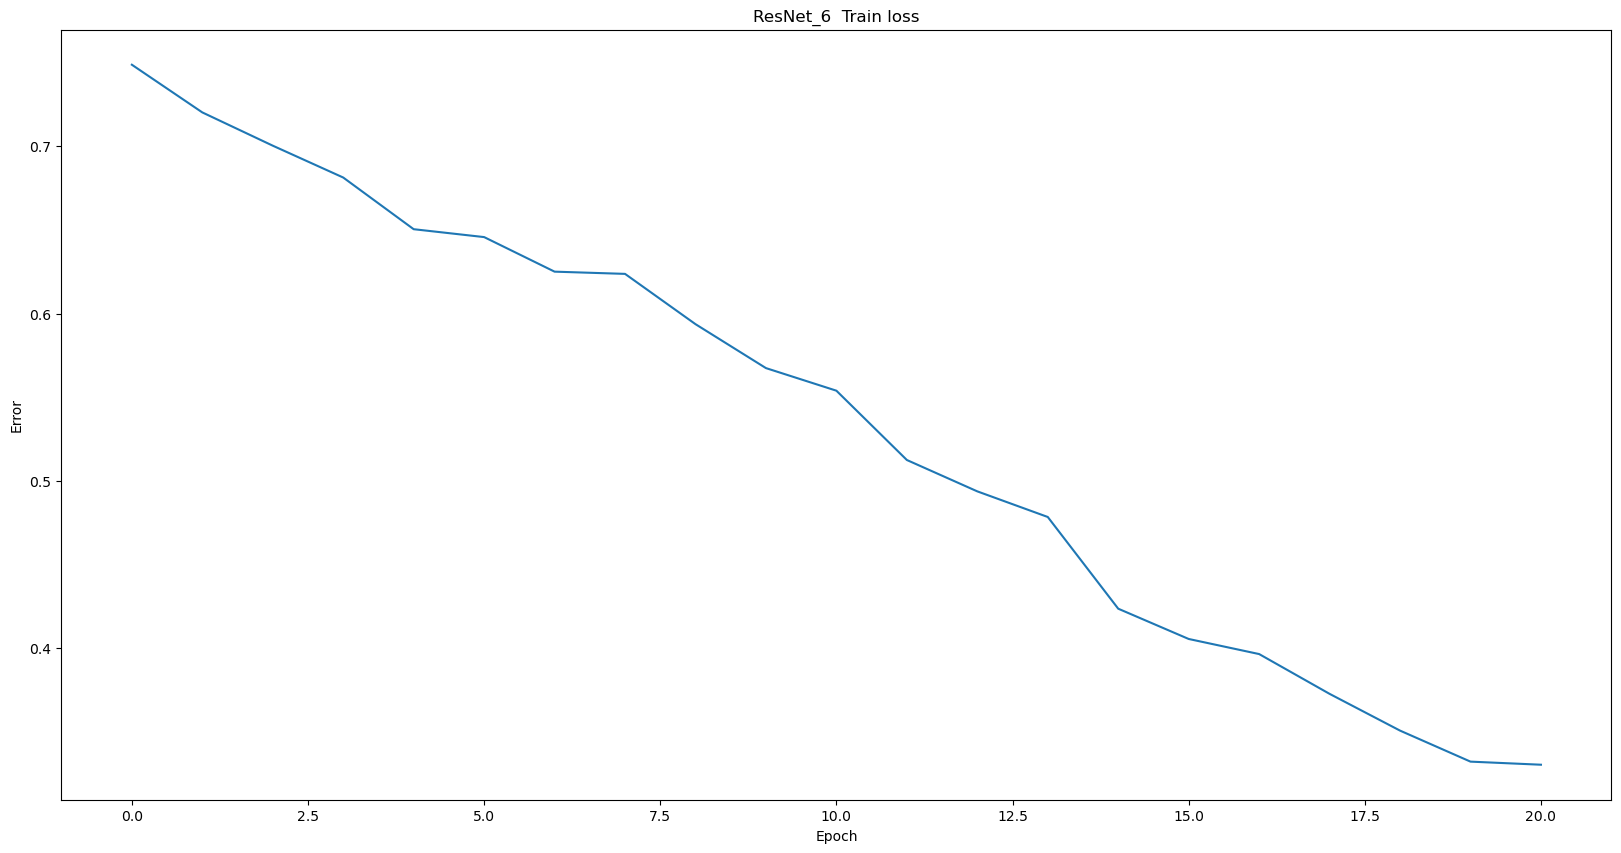

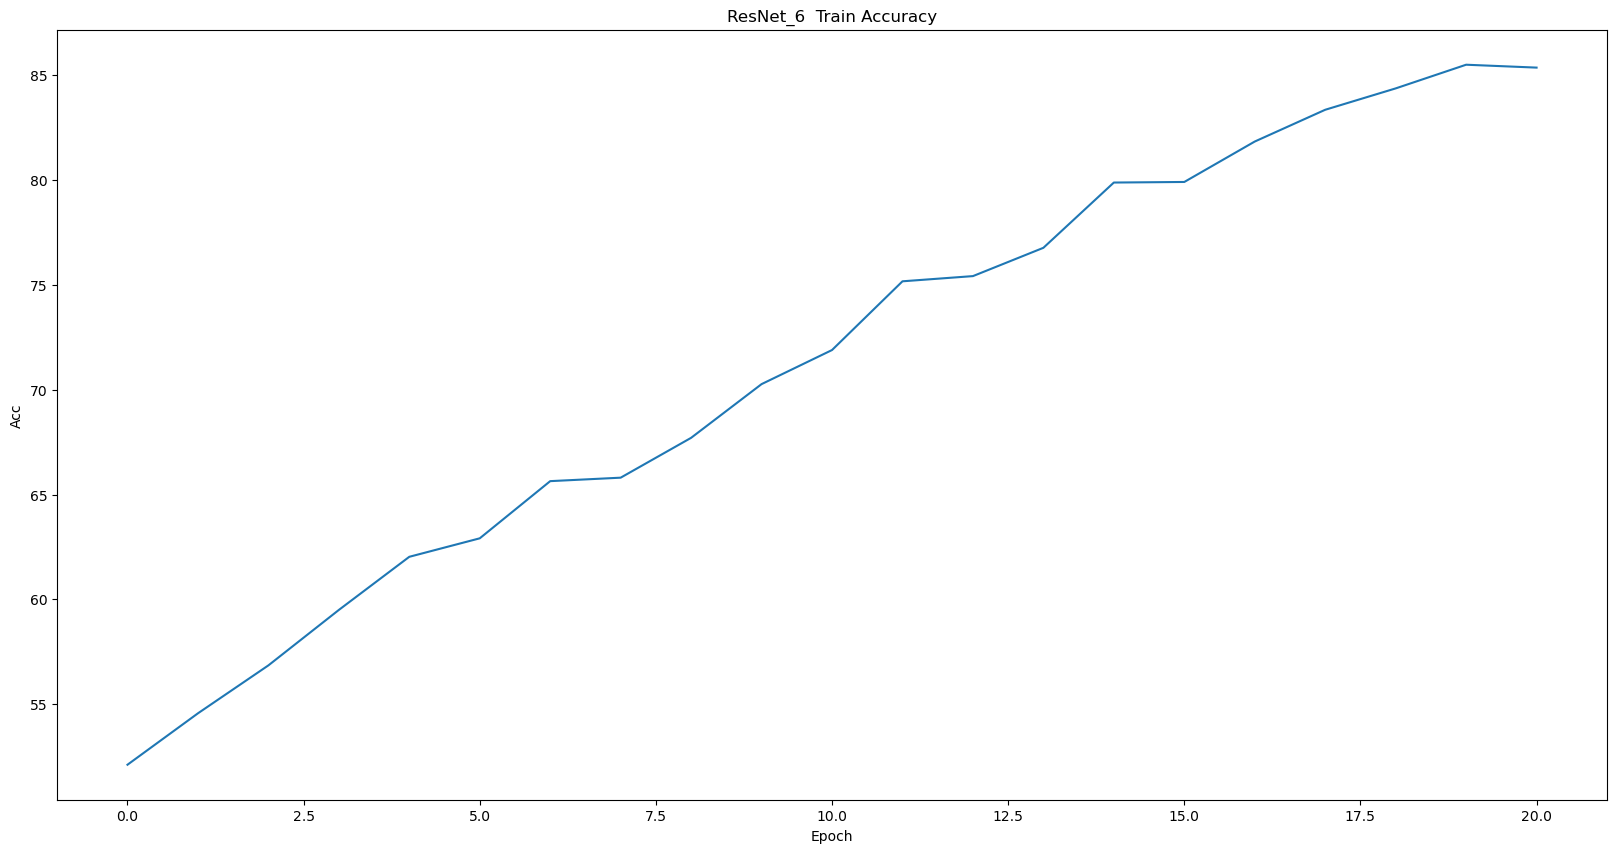

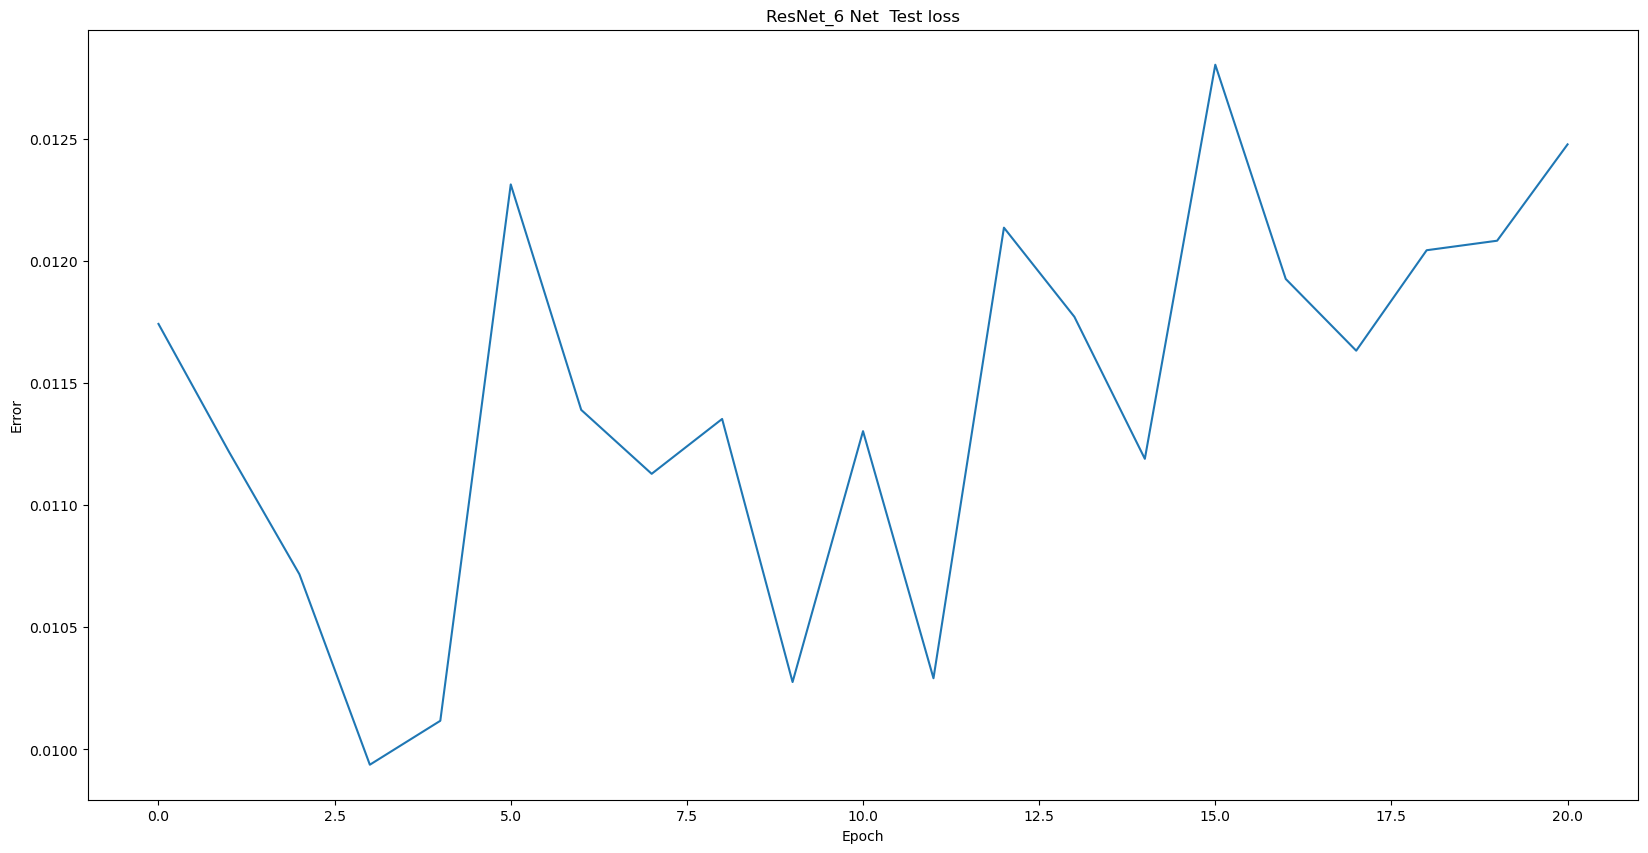

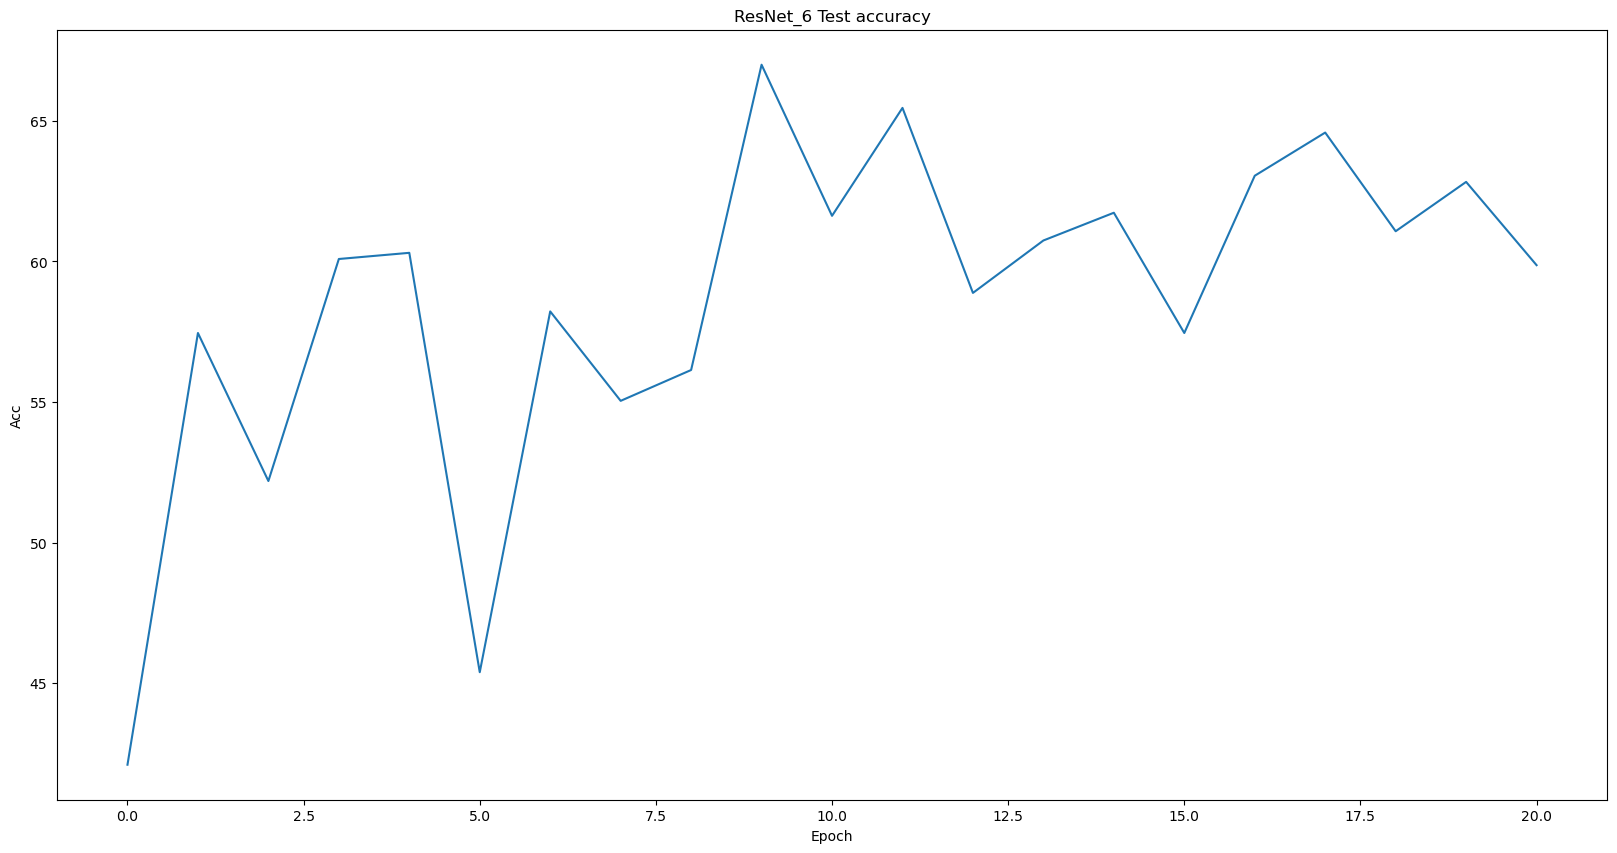

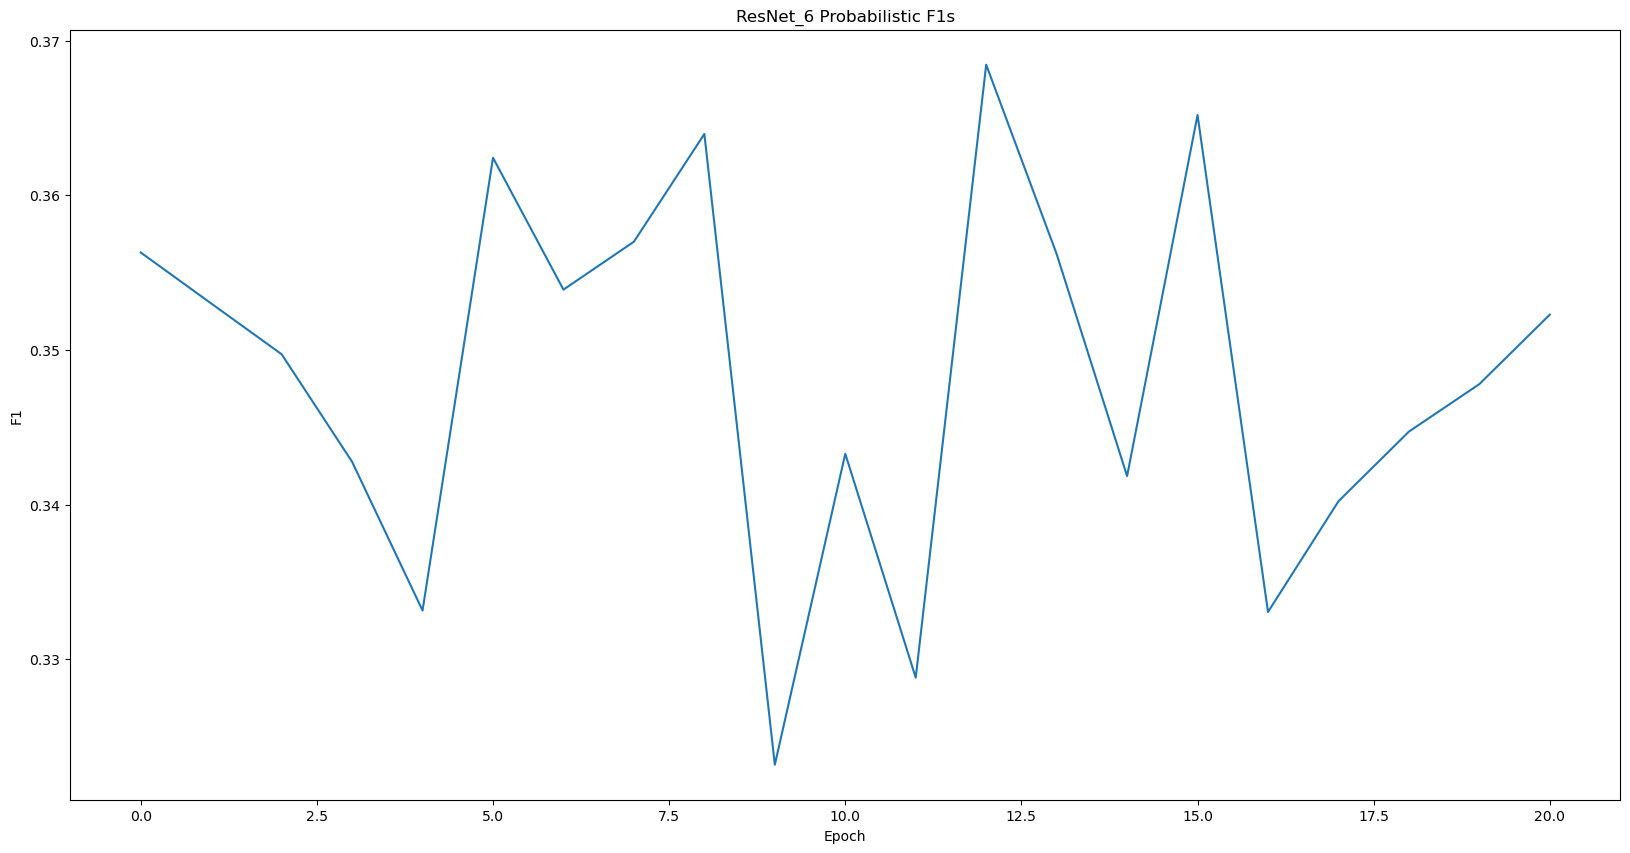

[[9113 4915]
 [2672 2116]]


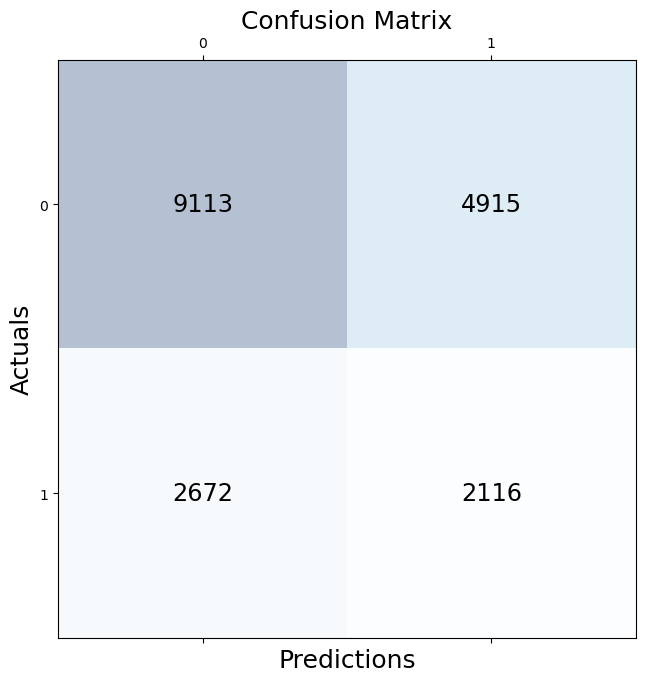

In [36]:
from sklearn.metrics import confusion_matrix
from torchvision.io import read_image
from torchvision.models import resnet50
import torch.nn.functional as F
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')


epo = 64
BATCH_SIZE = epo
TEST_BATCH_SIZE = epo
EPOCHS = 20
LEARNING_RATE = 0.01
MOMENTUM = 0.9
#MOMENTUM = 0
USE_CUDA = True
SEED = 0
PRINT_INTERVAL = 1000
WEIGHT_DECAY = 0.0001
version = "ResNet_6"
root_dir = "./kaggle/working/output/"

use_cuda = USE_CUDA and torch.cuda.is_available()
use_mps = USE_CUDA and torch.backends.mps.is_available()

device = torch.device("cuda" if use_cuda else "cpu")
if use_mps:
    device = torch.device("mps")

print('Using device', device)
import multiprocessing
print('num cpus:', multiprocessing.cpu_count())

kwargs = {'num_workers': multiprocessing.cpu_count(),
          'pin_memory': True} if use_cuda else {}


mamoData = mamoDataResNet
mamoDataTest = mamoDataTestResNet
#model = TinyImagenetNet().to(device)
model = customResnet18(dropout = 0.1).to(device)
#model = customResnext101(dropout = 0.1).to(device)
#model = customVit32(p=0.1).to(device)

weights = np.where(mamoData.labels == 1, 50/np.sum(mamoData.labels),50/(len(mamoData)-np.sum(mamoData.labels)))
weights = weights.squeeze()
sampler = torch.utils.data.WeightedRandomSampler(torch.tensor(weights, dtype = torch.double), num_samples = len(mamoData),replacement=True)
train_loader = torch.utils.data.DataLoader(mamoData, batch_size=BATCH_SIZE,sampler = sampler, drop_last = True, **kwargs)
test_loader = torch.utils.data.DataLoader(mamoDataTest, batch_size=TEST_BATCH_SIZE, shuffle=False, drop_last = True, **kwargs)

optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)

start_epoch = 0
train_losses = []
test_losses = []
test_accuracies = []
train_accuracies = []
f1s = []
f1ps = []

allPreds = []
allLabels = []

try:
    for epoch in range(start_epoch, EPOCHS + 1):
        print("Starting epoch ",epoch)
        lr = LEARNING_RATE * np.power(0.8, (int(epoch)))
        for g in optimizer.param_groups:
            g['lr'] = lr
        train_loss, train_accuracy = train(model, device, train_loader, optimizer, epoch, PRINT_INTERVAL)
        #test_loss, test_accuracy, correct_images, correct_val, error_images, predicted_val, gt_val, f1 = test(model, device, test_loader, True)
        test_loss, test_accuracy, f1,preds, labels, f1p = test(model, device, test_loader, False)
        #print(np.unique(predicted_val))
        allPreds += preds
        allLabels += labels
        train_losses.append((epoch, train_loss))
        train_accuracies.append((epoch, train_accuracy))
        test_losses.append((epoch, test_loss))
        test_accuracies.append((epoch, test_accuracy))
        f1s.append((epoch, f1))
        f1ps.append((epoch,f1p))
        print(epoch," - train_loss", str(train_loss)[:4]," - train_acc", str(train_accuracy)[:4],"\n")
        #pt_util.write_log(LOG_PATH + '.pkl', (train_losses, test_losses, test_accuracies))
        #model.save_best_model(test_accuracy, LOG_PATH + '%03d.pt' % epoch)


except KeyboardInterrupt as ke:
    print('Interrupted')
except:
    import traceback
    traceback.print_exc()
finally:
    #model.save_model(LOG_PATH + '%03d.pt' % epoch, 0)
    if not os.path.exists(root_dir):
        os.mkdir(root_dir)
    
    ep, val = zip(*train_losses)
    plot(ep, val, f'{version}  Train loss', 'Epoch', 'Error',version)
    ep, val = zip(*train_accuracies)
    plot(ep, val, f'{version}  Train Accuracy', 'Epoch', 'Acc',version)
    ep, val = zip(*test_losses)
    plot(ep, val, f'{version} Net  Test loss', 'Epoch', 'Error',version)
    ep, val = zip(*test_accuracies)
    plot(ep, val, f'{version} Test accuracy', 'Epoch', 'Acc',version)
    ep, val = zip(*f1ps)
    plot(ep, val, f'{version} Probabilistic F1s', 'Epoch', 'F1',version)
    
    torch.save(model.state_dict(), f"{root_dir}{version}_model.pth")
    with open(f'{root_dir}{version}_output.pickle', 'wb') as handle:
        outputDict={
            "train_losses" : train_losses,
            "train_accuracies" : train_accuracies,
            "test_losses" : test_losses,
            "test_accuracy" : test_accuracies,
            "test_f1s" : f1s,
            "p_f1s": f1ps,
            "final_epoch": epoch,
            "preds" : allPreds,
            "labels" : allLabels,
            #"model" : model.cpu(),
        }
        pickle.dump(outputDict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    conf_matrix = confusion_matrix(allLabels,allPreds)
    print(conf_matrix)
    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    fig.savefig(f'{root_dir}confusion_matrix_{version}.png')
    #correct_images = pt_util.to_scaled_uint8(correct_images.transpose(0, 2, 3, 1))
    #error_images = pt_util.to_scaled_uint8(error_images.transpose(0, 2, 3, 1))
    #pt_util.show_images(correct_images, ['correct: %s' % class_names[aa] for aa in correct_val])
    #pt_util.show_images(error_images, ['pred: %s, actual: %s' % (class_names[aa], class_names[bb]) for aa, bb in zip(predicted_val, gt_val)])



In [ ]:
def load_model(version, root_dir="/kaggle/working/output/"):
    with open(f'{root_dir}{version}_output.pickle', 'rb') as handle:
        outputDict = pickle.load(handle)
        ep, val = zip(*outputDict['train_losses'])
        plot(ep, val, 'ResNet  Train loss', 'Epoch', 'Error',version)
        ep, val = zip(*outputDict['train_accuracies'])
        plot(ep, val, 'ResNet  Train Accuracy', 'Epoch', 'Accuracy',version)
        ep, val = zip(*outputDict['test_losses'])
        plot(ep, val, 'ResNet Net  Test loss', 'Epoch', 'Error',version)
        ep, val = zip(*outputDict['test_accuracy'])
        plot(ep, val, 'ResNet Test accuracy', 'Epoch', 'Accuracy',version)

In [ ]:
#load_model("ResNext101_1.1")
#!zip -r output.zip /kaggle/working/output

<a href="./output.zip"> Download File </a>